# Chapter 5b: Understanding how CNNs work

It is now time to better understand how CNNs find patterns on their own, via internal featues. In this notebook, we will learn how to visualise filters and feature maps.

Deep neural networks are generally opaque, meaning that although they can make useful and skillful predictions, it is not clear how or why a given prediction was made. CNNs have internal structures that are designed to operate upon two-dimensional image data, and as such preserve the spatial relationships for what was learned by the model. Specifically, the two-dimensional filters learned by the model can be inspected and visualized to discover the types of features that the model will detect, and the activation maps output by convolutional layers can be inspected to understand exactly what features were detected for a given input image.

In [1]:
import matplotlib.pyplot as plt


## 1. Loading a pre-trained CNN model

We need a model to visualize. Instead of fitting a model from scratch, we will use a pre-trained state-of-the-art image classification model. Keras provides many examples of well-performing image classification models developed by different research groups for the ImageNet Large Scale Visual Recognition Challenge (ILSVRC). One example is the VGG-16 model that achieved top results in the 2014 competition (note that VGG stands for "Visual Geometry Group"). Unfortunately there is no CNN model trained on geo-data that we could use to easily interpret filter and feature map plots.

This is a good model to use for visualization because it has a simple uniform structure of serially ordered convolutional and pooling layers, and it performed very well, meaning that the filters and resulting feature maps will capture useful features. For more information on this model, see “Very Deep Convolutional Networks for Large-Scale Image Recognition” (Simonyan & Zisserman, 2014)

We can load and summarize the VGG16 model with just a few lines of code.

_WARNING:_ If this is the first time that you have loaded the model, the weights will be downloaded from the internet and stored in your home directory. These weights are approximately 500MB and may take a moment to download depending on the speed of your internet connection.

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16 
# from keras.applications.vgg16 import VGG16   # load vgg model
model = VGG16()                              # load the model

D:\software\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\software\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\software\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\software\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


D:\software\anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\software\anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\software\anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\software\anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWa

**EXERCISE 1:** Describe the loaded CNN model. How many learned layers does it contain?

In [3]:
# YOUR CODE HERE
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

YOUR ANSWER HERE:
16 learnd layers

## 2. Visualizing filters

The simplest visualization to perform is to plot the learned filters directly. They are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image should be meaningful.

The first step is to review the filters in the model.

The model summary printed in the previous section (exercise 1) summarizes the output shape of each layer, e.g. the shape of the resulting feature maps. It does not give any idea of the shape of the filters (weights) in the network, only the total number of weights per layer.

We can access all of the layers of the model via the `model.layers` property.

Each layer has a `layer.name` property, where the convolutional layers have a naming convolution like `block#_conv#`, where the `#` is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string `conv`.

Each convolutional layer has two sets of weights. One is the block of filters and the other is the block of bias values. These are accessible via the `layer.get_weights()` function.

**EXERCISE 2:** Retrieve these weights and then summarize their shape per layer name.

In [26]:
# YOUR CODE

# summarize filter shapes
for layer in model.layers:
#     check for convolutional layer
   if 'conv' not in layer.name:
       continue
#     get filter weights
   filters, biases = layer.get_weights()
   print(layer.name ,filters.shape)


block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


**EXERCISE 3:** Make sense of this result. Explain in words the meaning of the 4 dimensions of the different filter arrays.

_YOUR ANSWER HERE_

The first and second dimensions represent the size of filter in each channel is 3*3, the third dimension represent number of channels, the fourth dimension represent number of filters.

We could visualize one filter as a plot with three images, one for each channel, or compress all three down to a single color image, or even just look at the first channel and assume the other channels will look the same. The problem is, we then have 63 other filters that we might like to visualize.

**EXERCISE 4:** Retrieve the filters from the first layer. Then normalise to 0-1. _Hints:_ See previous code cell. A given layer $i$ can be retrieved by calling `layers[i]` in the model.

In [20]:
# YOUR CODE HERE
filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

**EXERCISE 5:** Enumerate the first six filters out of the 64 in the block and plot each of the three channels of each filter.

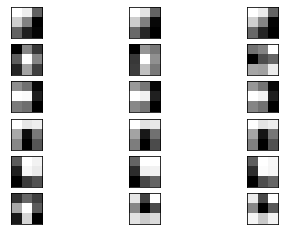

In [23]:
# YOUR CODE HERE
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
   f = filters[:, :, :, i]
    # plot each channel separately
   for j in range(3):
        # specify subplot and turn of axis
       ax = plt.subplot(n_filters, 3, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(f[:, :, j], cmap='gray')
       ix += 1



The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. Using this intuition, we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.

Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. Visualizing all 64 filters in one image is feasible. Unfortunately, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail! So let us move to the visualisation of feature maps.

## 3. Visualizing feature maps

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general, abstract features.

In order to explore the visualization of feature maps, we need input for the VGG16 model that can be used to create activations. We will use a simple photograph of a bird (copyright: Chris Heald, https://www.flickr.com/photos/husker_alum/8628754308/). Unfortunately, of the 1,000 classes in ImageNet, none relate to geo-data. Download the photograph and place it `data/bird.jpeg`.

Next, we need a clearer idea of the shape of the feature maps output by each of the convolutional layers and the layer index number so that we can retrieve the appropriate layer output. The example below will enumerate all layers in the model and print the output size or feature map size for each convolutional layer as well as the layer index in the model.

In [25]:
1

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


We can use this information and design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map. For example, after loading the VGG model, we can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows.

In [32]:
from tensorflow.keras.models import Model

# redefine model to output right after the first hidden layer
model_get1stFeatureMaps = Model(inputs=model.inputs, outputs=model.layers[1].output)

Let's then load and reformat the input image.

In [33]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

# load the image with the required shape
img = load_img('bird.jpeg', target_size = (224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

img.shape

(1, 224, 224, 3)

**EXERCISE 6:** You can now predict the feature maps for our input image of the first CONV layer with the model we defined above. Use the same approach as used in previous chapters with scikit-learn.

In [34]:
# YOUR CODE HERE
feature_maps = model_get1stFeatureMaps.predict(img)


**EXERCISE 7:** Plot all 64 maps in an 8x8 square. _Hint:_ Maybe first print the shape of `feature_maps` to see how to fill the template given below.

In [35]:
feature_maps.shape

(1, 224, 224, 64)

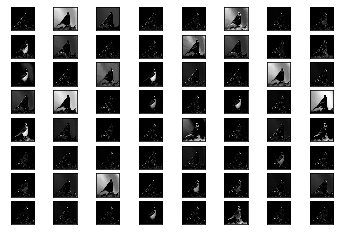

In [37]:
# YOUR CODE HERE
square = 8
ix = 1
for _ in range(square):
   for _ in range(square):
        # specify subplot and turn of axis
       ax = plt.subplot(square, square, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
       ix += 1



**EXERCISE 8:** The plot is too small. Copy paste the code below and add a matplotlib function so that the plot is about as wide as the notebook's width.

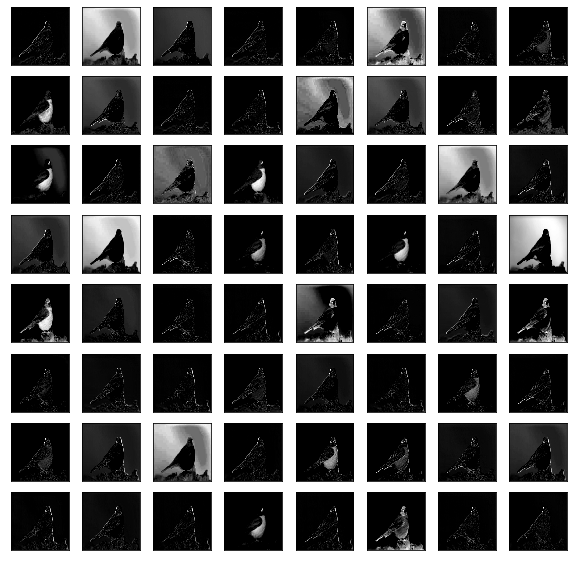

In [41]:
# YOUR CODE HERE
fig = plt.figure(figsize = (10,10) )
square = 8
ix = 1
for _ in range(square):
   for _ in range(square):
        # specify subplot and turn of axis
       ax = plt.subplot(square, square, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
       ix += 1




**EXERCISE 9:** What kinds of features are highlighted in this first CONV layer?

YOUR ANSWER HERE

I think the difference between the bird and the backgroud is highlighted.


**EXERCISE 10:** Plot the feature maps of `block5_conv3`. _Hint:_ We know that the number of feature maps (e.g. depth or number of channels) in deeper layers is much more than 64, such as 256 or 512. Nevertheless, we can cap the number of feature maps visualized at 64 for consistency.

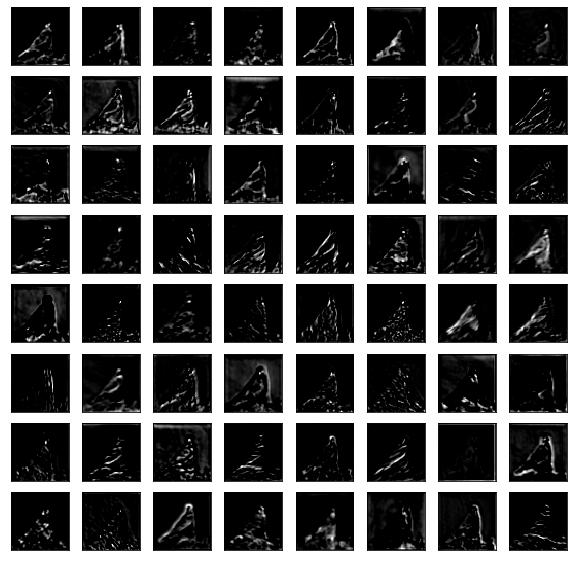

In [47]:
# YOUR CODE HERE
model_get1stFeatureMaps = Model(inputs=model.inputs, outputs=model.layers[9].output)
feature_maps = model_get1stFeatureMaps.predict(img)
fig = plt.figure(figsize = (10,10) )
square = 8
ix = 1
for _ in range(square):
   for _ in range(square):
        # specify subplot and turn of axis
       ax = plt.subplot(square, square, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
       ix += 1

**EXERCISE 11:** Compare the first feature maps with the last feature maps of the CNN. What can you say?

YOUR ANSWER HERE

These figures are more blurred than the previous figures, but some features of bird are clearer in these figures.


## 4. Visualizing feature maps for MNIST data

It is now time for you to develop your own CNN model for the MNIST data and investigate the feature maps based on what we just learned. _Hint:_ You can first copy paste part of the chapter 5a notebook.

**EXERCISE 12:** Load the MNIST dataset, reformat it for the CNN and train a CNN model with several CONV layers.

In [54]:
# YOUR CODE HERE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data ()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# input normalization
X_train /= 255           # same as X_train = X_train / 255
X_test /= 255

# one hot encoding of outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train[0]  # example of one-hot encoding


# building the input vector from the 28x28 pixels
X_train_img = X_train.reshape(60000, 28,28,1)
X_test_img = X_test.reshape(10000, 28, 28,1)
X_train_img = X_train_img.astype('float32')
X_test_img = X_test_img.astype('float32')

# input normalization
X_train_img /= 255           # same as X_train = X_train / 255
X_test_img /= 255

# one hot encoding of outputs
y_train_img = y_train
y_test_img = y_test

# YOUR CODE HERE
model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax')
])

model_CNN.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model_CNN.summary()
training_epochs = 10

results = model_CNN.fit(
    X_train_img, y_train_img,
    epochs = training_epochs,
    validation_data = (X_test_img, y_test_img),
    verbose = 0   # 0 to hide the training progress, 1 otherwise
)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

**EXERCISE 13:** You will need to predict the feature maps for an input image. Define your image as one that contains a 4.

(28, 28)

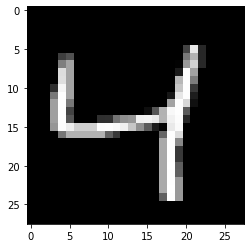

In [62]:
image = X_train_img[2,:,:,0]
plt.imshow(image, cmap='gray')
image.shape

**EXERCISE 14:** Plot some of the feature maps for the first and last CONV layers of your CNN model. _Hint:_ Remember to reformat your image.

In [66]:
# YOUR CODE HERE
for i in range(len(model_CNN.layers)):
    layer = model_CNN.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_2 (?, 26, 26, 32)
2 conv2d_3 (?, 11, 11, 64)
3 conv2d_4 (?, 9, 9, 64)


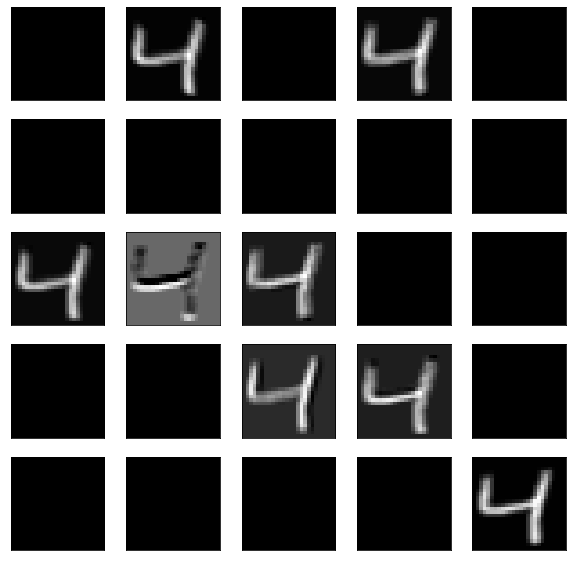

In [72]:
# YOUR CODE HERE - CONTINUED
model_get1stFeatureMaps = Model(inputs=model_CNN.inputs, outputs=model_CNN.layers[0].output)
image = image.reshape(1, 28,28,1)
feature_maps = model_get1stFeatureMaps.predict(image)
fig = plt.figure(figsize = (10,10) )
square = 5
ix = 1
for _ in range(square):
   for _ in range(square):
        # specify subplot and turn of axis
       ax = plt.subplot(square, square, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
       ix += 1

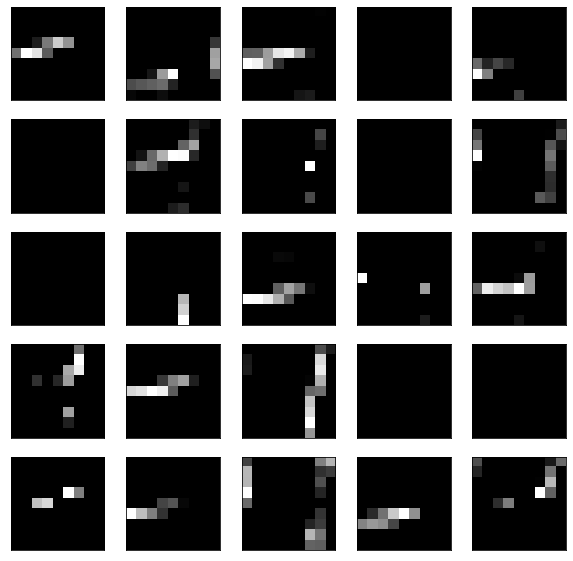

In [73]:
# YOUR CODE HERE - CONTINUED
# YOUR CODE HERE - CONTINUED
model_get1stFeatureMaps = Model(inputs=model_CNN.inputs, outputs=model_CNN.layers[3].output)
image = image.reshape(1, 28,28,1)
feature_maps = model_get1stFeatureMaps.predict(image)
fig = plt.figure(figsize = (10,10) )
square = 5
ix = 1
for _ in range(square):
   for _ in range(square):
        # specify subplot and turn of axis
       ax = plt.subplot(square, square, ix)
       ax.set_xticks([])
       ax.set_yticks([])
        # plot filter channel in grayscale
       plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
       ix += 1

## References

* Simonyan & Zisserman (2014), Very Deep Convolutional Networks for Large-Scale Image Recognition, arXiv:1409.1556